<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/EDAForWinnipeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To analyze data, please 
create heating and cooling hourly profiles for several weeks including  

*   coldest
* warmest week
* average week.

In [307]:
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
from google.colab import drive
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing, impute
plt.style.use("ggplot")
random_state=42
rng = np.random.default_rng(random_state)
drive.mount('/content/saj')

Drive already mounted at /content/saj; to attempt to forcibly remount, call drive.mount("/content/saj", force_remount=True).


In [308]:
def load_data(col=None, path="/content/saj/MyDrive/Kavgic/medium officeMultivariate.csv", verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

print("Multivariate Sample")
multivar_df = load_data(['Date','Temperature','Natural Gas HVAC', 'CoolingElectricity'], verbose = True ) 

Multivariate Sample
                            Date  Temperature  Natural Gas HVAC  \
0  2006-01-01 00:00:00.000 +0100    -3.533333      1.467485e+07   
1  2006-01-01 01:00:00.000 +0100     2.400000      1.003896e+07   
2  2006-01-01 02:00:00.000 +0100     5.183333      1.010276e+07   
3  2006-01-01 03:00:00.000 +0100     6.508333      6.419083e+06   
4  2006-01-01 04:00:00.000 +0100     6.741667      7.052296e+06   

   CoolingElectricity  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [309]:
multivar_df

,Date,Temperature,Natural Gas HVAC,CoolingElectricity
0,2006-01-01 00:00:00.000 +0100,-3.533333,1.467485e+07,0.0
1,2006-01-01 01:00:00.000 +0100,2.400000,1.003896e+07,0.0
2,2006-01-01 02:00:00.000 +0100,5.183333,1.010276e+07,0.0
3,2006-01-01 03:00:00.000 +0100,6.508333,6.419083e+06,0.0
4,2006-01-01 04:00:00.000 +0100,6.741667,7.052296e+06,0.0
...,...,...,...,...
8755,2006-12-31 19:00:00.000 +0100,-11.300000,9.835086e+06,0.0
8756,2006-12-31 20:00:00.000 +0100,-11.183333,8.718036e+06,0.0
8757,2006-12-31 21:00:00.000 +0100,-10.458333,1.161742e+07,0.0
8758,2006-12-31 22:00:00.000 +0100,-8.541667,9.012684e+06,0.0


In [310]:
multivar_df.describe()

,Temperature,Natural Gas HVAC,CoolingElectricity
count,8760.000000,8.760000e+03,8.760000e+03
mean,5.737492,4.103645e+07,1.552237e+07
std,12.302740,8.793312e+07,3.759656e+07
min,-24.358333,0.000000e+00,0.000000e+00
25%,-3.900000,0.000000e+00,0.000000e+00
50%,6.512500,0.000000e+00,0.000000e+00
75%,16.100000,1.182892e+07,0.000000e+00
max,32.766667,4.514913e+08,2.937108e+08


# Coldest weak 

In [311]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None,use_index=True):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 6))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

# each rectangle in the following week representes a week

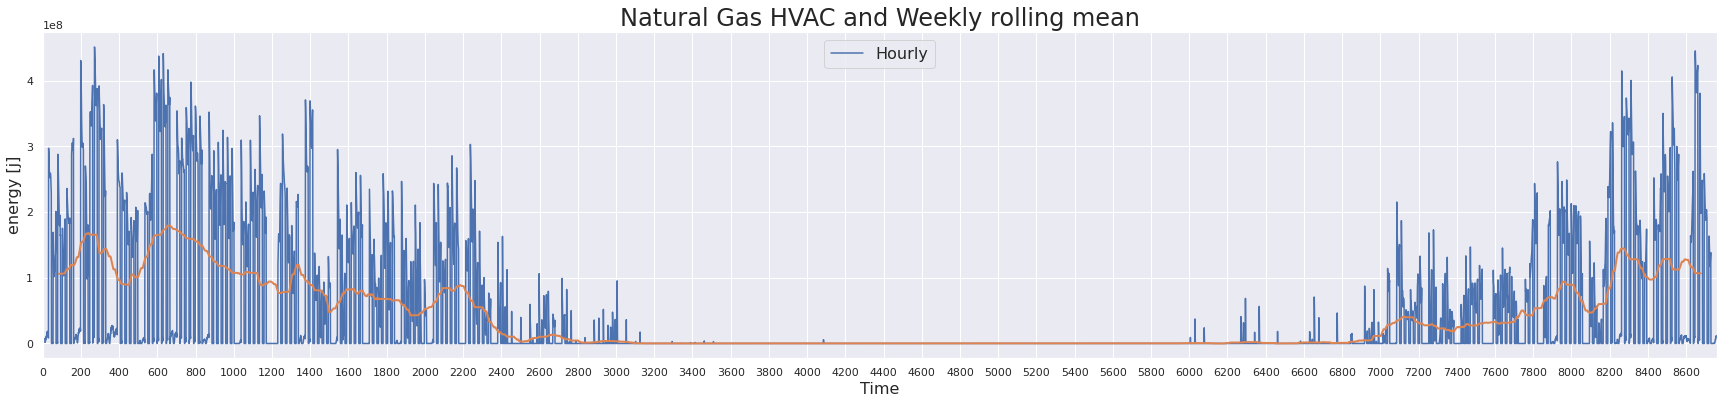

In [312]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

rolling = multivar_df['Natural Gas HVAC'].rolling(24*7, center=True).mean()
ax = plot_series(multivar_df, 'Natural Gas HVAC', label='Hourly', ylabel='energy [j]',
                 title='Natural Gas HVAC and Weekly rolling mean',use_index=True)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=52))
ax.set_xlim(0, 8760)
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

* It can be seen that in t= 672-840  (4th week) we have the highest energy  


vertical lines are for 2 hr

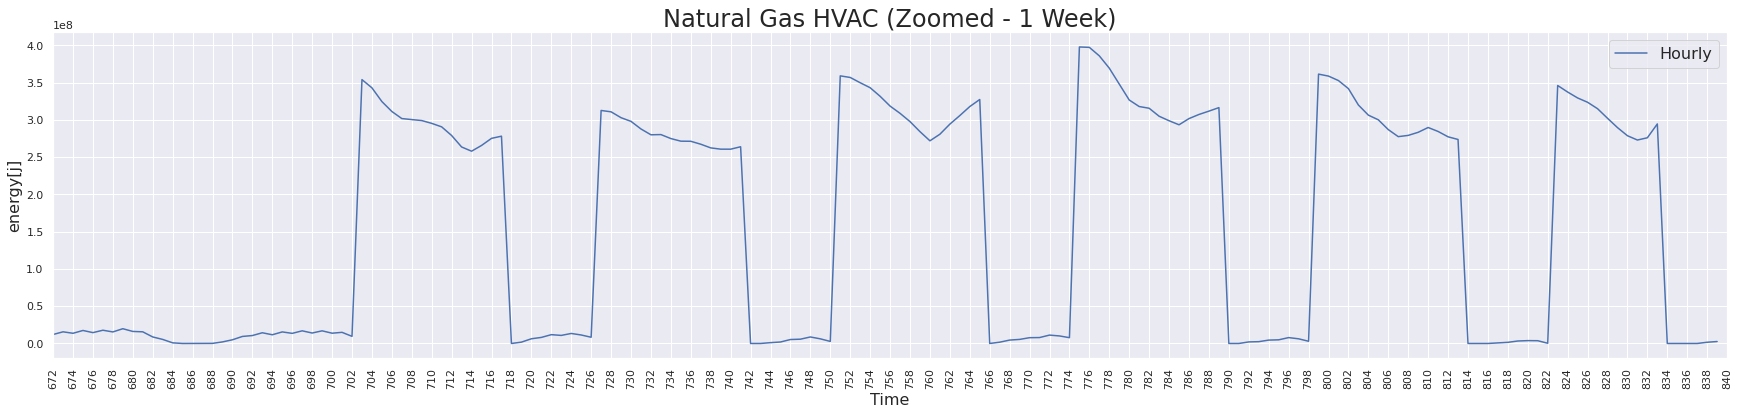

In [323]:

ax = plot_series(multivar_df, 'Natural Gas HVAC', label='Hourly', ylabel='energy[j]',
                 start=672, end=840,
                 title='Natural Gas HVAC (Zoomed - 1 Week)')
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=168/2))
ax.set_xlim(672, 840)
plt.xticks( rotation=90)
plt.show()

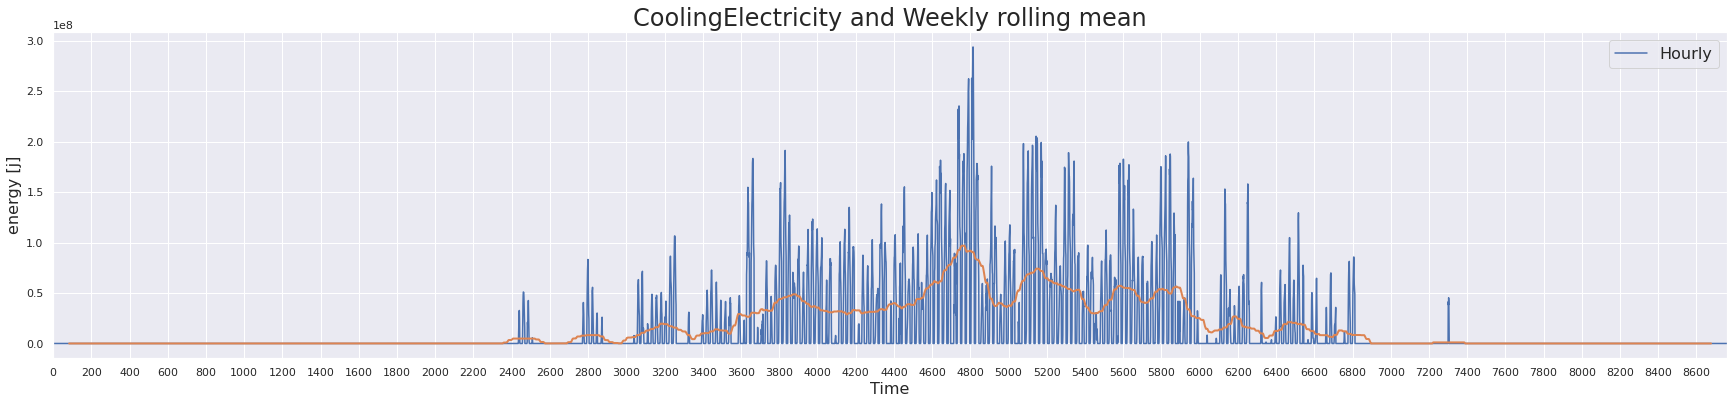

In [314]:
rolling_c = multivar_df['CoolingElectricity'].rolling(24*7, center=True).mean()
ax = plot_series(multivar_df, 'CoolingElectricity', label='Hourly', ylabel='energy [j]',
                 title='CoolingElectricity and Weekly rolling mean',use_index=True)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=52))
ax.set_xlim(0, 8760)
ax.plot(rolling_c, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

* It can be seen that in t= 672-840  (4th week) we have the highest energy  


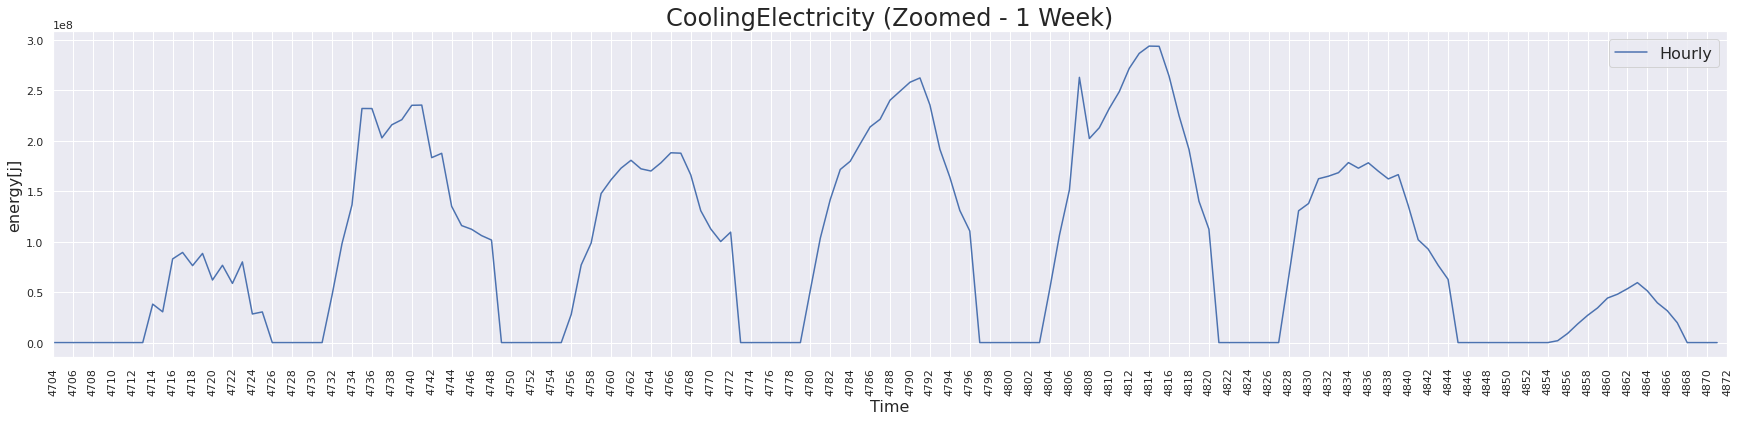

In [325]:
ax = plot_series(multivar_df, 'CoolingElectricity', label='Hourly', ylabel='energy[j]',
                 start=4704, end=4872,
                 title='CoolingElectricity (Zoomed - 1 Week)')
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=168/2))
ax.set_xlim(4704, 4872)
plt.xticks( rotation=90)
plt.show()

# Data analyse for 10 years in winnipeg

---



# importing Data

In [170]:
def load_data(col=None, path='/content/saj/MyDrive/Kavgic/AllFeaturesInAllyears.csv', verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

dg = load_data()
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           87600 non-null  object 
 1   Dry Bulb Temperature {C}                                       87599 non-null  float64
 2   Dew Point Temperature {C}                                      87600 non-null  float64
 3   Relative Humidity {%}                                          87600 non-null  float64
 4   Atmospheric Pressure {Pa}                                      87600 non-null  float64
 5   Extraterrestrial Horizontal Radiation {Wh/m2}                  87600 non-null  int64  
 6   Extraterrestrial Direct Normal Radiation {Wh/m2}               87600 non-null  int64  
 7   Horizontal Infrared Radiation Intensity from Sky {Wh/m2}  

In [ ]:
raw_df = load_data(['Date','Dry Bulb Temperature {C}' , ])

In [159]:
raw_df.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      87600 non-null  object 
 1   Dry Bulb Temperature {C}  87599 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


# seperating years and reseting their index

In [160]:
raw_df['Date']= pd.to_datetime(raw_df['Date'], errors='coerce', utc=True)

In [161]:
year2010 = raw_df[raw_df['Date'].dt.year == 2010]
year2010 = year2010.reset_index(drop=True)
year2011 = raw_df[raw_df['Date'].dt.year == 2011]
year2011 = year2011.reset_index(drop=True)
year2012 = raw_df[raw_df['Date'].dt.year == 2012]
year2012 = year2012.reset_index(drop=True)
year2013 = raw_df[raw_df['Date'].dt.year == 2013]
year2013 = year2013.reset_index(drop=True)
year2014 = raw_df[raw_df['Date'].dt.year == 2014]
year2014 = year2014.reset_index(drop=True)
year2015 = raw_df[raw_df['Date'].dt.year == 2015]
year2015 = year2015.reset_index(drop=True)
year2016 = raw_df[raw_df['Date'].dt.year == 2016]
year2016 = year2016.reset_index(drop=True)
year2017 = raw_df[raw_df['Date'].dt.year == 2017]
year2017 = year2017.reset_index(drop=True)
year2018 = raw_df[raw_df['Date'].dt.year == 2018]
year2018 = year2018.reset_index(drop=True)
year2019 = raw_df[raw_df['Date'].dt.year == 2019]
year2019 = year2019.reset_index(drop=True)

In [162]:
# raw_df[raw_df['Date'].between('2019-01-01', '2019-12-31')]

# evaluating the coldest year considering the four seasons

In [163]:
List_of_years = [year2010['Dry Bulb Temperature {C}'] , year2011['Dry Bulb Temperature {C}'], year2012['Dry Bulb Temperature {C}'], year2013['Dry Bulb Temperature {C}']
                 , year2014['Dry Bulb Temperature {C}'],year2015['Dry Bulb Temperature {C}'],year2016['Dry Bulb Temperature {C}'],
                 year2017['Dry Bulb Temperature {C}'],year2018['Dry Bulb Temperature {C}'],year2019['Dry Bulb Temperature {C}']]
Name_of_years = pd.Series(['year2010' , 'year2011', 'year2012', 'year2013', 'year2014','year2015','year2016','year2017','year2018','year2019'],name='Date')

MeanTemp = list()
for i in  List_of_years :
  
  Mean = i.mean()
  MeanTemp.append(Mean)
print(MeanTemp)
MeanTemp = pd.Series((i for i in MeanTemp),name='MeanTemp')
MeanTemp

[6.351575342465754, 5.028413242009132, 5.8242808219178075, 3.119280821917808, 2.8109715720972717, 5.668299086757991, 6.132159377017695, 5.018012691185501, 4.181703732856735, 3.4302411367923287]


0    6.351575
1    5.028413
2    5.824281
3    3.119281
4    2.810972
5    5.668299
6    6.132159
7    5.018013
8    4.181704
9    3.430241
Name: MeanTemp, dtype: float64

In [164]:
import pandas as pd
dff=pd.concat([Name_of_years ,MeanTemp], axis=1)
dff

,Date,MeanTemp
0,year2010,6.351575
1,year2011,5.028413
2,year2012,5.824281
3,year2013,3.119281
4,year2014,2.810972
5,year2015,5.668299
6,year2016,6.132159
7,year2017,5.018013
8,year2018,4.181704
9,year2019,3.430241


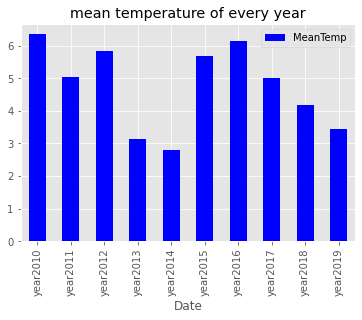

In [168]:

# bar plot
dff.plot(kind = 'bar',
        x = 'Date',
        y = 'MeanTemp',
        color = 'blue')
  
# set the title
plt.title('mean temperature of every year')
  
# show the plot
plt.show()

The coldest year based on four season is 2014 and the warmest is 2010

From now on I care only to the coldest and warmest year

# Lets look at the coldest winter and hottest summer